IIB40303 Programming for Data Analytics 

Case Based Studies 

Group Member:

1. Nurathira Abdul Aziz 52224221176

2. Siti Nur Amizah Binti Mohamed Ali 52224222179  

The dataset used for this case based studies was obtained from Kaggle at https://www.kaggle.com/datasets/zeesolver/spotfy/data

This dataset provides concise details about music tracks and their performance across various platforms.

With this data, analysts can evaluate the popularity, genre, and audience engagement of different music offerings across multiple streaming services.

The main business problem we aim to solve is understanding the factors that contribute to the popularity of music tracks across various streaming platforms. This insight can help music producers, streaming platforms, and marketers to optimize their strategies for promoting tracks, curating playlists, and enhancing user engagement.


Our objective is to analyze the dataset to uncover patterns and trends that indicate why certain tracks perform better than others. Specifically, we'll be looking at metrics like danceability, energy, acousticness, and their correlation with the popularity of tracks as indicated by their presence in playlists and charts across platforms.

1. Data Preparation and Cleaning

In [1]:
#filtering out the warnings if any

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [3]:
#load the csv file and store it in a dataframe
df = pd.read_csv("Popular_Spotify_Songs.csv", encoding='latin1')

In [4]:
#reading the spotify data and get the top 5 rows of the dataframe

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6


In [5]:
#finding out how many rows and columns are there in this dataset

df.shape

(953, 24)

There are 24 columns and 953 rows in this dataset

In [6]:
#inspecting the dataframe for dimensions, null-values, and summary of different columns
#list out all the 24 column name in this dataset

columns = df.columns.tolist()
columns

['track_name',
 'artist(s)_name',
 'artist_count',
 'released_year',
 'released_month',
 'released_day',
 'in_spotify_playlists',
 'in_spotify_charts',
 'streams',
 'in_apple_playlists',
 'in_apple_charts',
 'in_deezer_playlists',
 'in_deezer_charts',
 'in_shazam_charts',
 'bpm',
 'key',
 'mode',
 'danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%']

In [7]:
#check the column-wise info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    object 
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    object 
 14  bpm                   953 non-null    int64  
 15  key                   8

In [8]:
#checking null value in the dataset
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [9]:
# Rename columns for ease of use
df = df.rename(columns={'artist(s)_name': 'artists', 'released_year': 'year', 'released_month': 'month', 'released_day': 'day', 'danceability_%': 'danceability',
                        'valence_%': 'valence', 'energy_%': 'energy', 'acousticness_%': 'acousticness', 'instrumentalness_%': 'instrumentalness', 
                        'liveness_%': 'liveness', 'speechiness_%': 'speechiness'})

# Handle missing values
df.fillna(0, inplace=True)

# Check data types and information
df.info()

#print top 5 rows of the dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artists               953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   year                  953 non-null    int64  
 4   month                 953 non-null    int64  
 5   day                   953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    object 
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    object 
 14  bpm                   953 non-null    int64  
 15  key                   9

,track_name,artists,artist_count,year,month,day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6


In [10]:
# Convert release date columns to datetime
df['release_date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Drop month and day columns
df.drop(columns=['month', 'day'], inplace=True)

# Check data types and information
print(df.info())

# Set the datetime column as the index
df.set_index('release_date', inplace=True)

# keep the release_date as a regular column instead of the index
df.reset_index(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            953 non-null    object        
 1   artists               953 non-null    object        
 2   artist_count          953 non-null    int64         
 3   year                  953 non-null    int64         
 4   in_spotify_playlists  953 non-null    int64         
 5   in_spotify_charts     953 non-null    int64         
 6   streams               953 non-null    float64       
 7   in_apple_playlists    953 non-null    int64         
 8   in_apple_charts       953 non-null    int64         
 9   in_deezer_playlists   953 non-null    object        
 10  in_deezer_charts      953 non-null    int64         
 11  in_shazam_charts      953 non-null    object        
 12  bpm                   953 non-null    int64         
 13  key                 

In [11]:
#rechecking for the top 5 rows for columns update
df.head()

,release_date,track_name,artists,artist_count,year,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,2023-07-14,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,553,147,141381703.0,43,263,...,125,B,Major,80,89,83,31,0,8,4
1,2023-03-23,LALA,Myke Towers,1,2023,1474,48,133716286.0,48,126,...,92,C#,Major,71,61,74,7,0,10,4
2,2023-06-30,vampire,Olivia Rodrigo,1,2023,1397,113,140003974.0,94,207,...,138,F,Major,51,32,53,17,0,31,6
3,2019-08-23,Cruel Summer,Taylor Swift,1,2019,7858,100,800840817.0,116,207,...,170,A,Major,55,58,72,11,0,11,15
4,2023-05-18,WHERE SHE GOES,Bad Bunny,1,2023,3133,50,303236322.0,84,133,...,144,A,Minor,65,23,80,14,63,11,6


In [12]:
#rechecking on how many rows and columns are there in this dataset
df.shape

(953, 23)

After dropping column 'month' and 'day', and adding the column 'release date', we have 23 columns now

2. Exploratory Data Analysis (EDA)

In [13]:
#check the summary for the numeric columns.
#here, we can see all the features with their data types, missing values, and basic statistics.
#now, we can get an idea of this spotify songs playlist dataset.

df.describe()

,release_date,artist_count,year,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
count,953,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,2018-09-10 05:09:45.519412480,1.556139,2018.238195,5200.124869,12.009444,5.135979e+08,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
min,1930-01-01 00:00:00,1.000000,1930.000000,31.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,2020-06-28 00:00:00,1.000000,2020.000000,875.000000,0.000000,1.413817e+08,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,2022-04-08 00:00:00,1.000000,2022.000000,2224.000000,3.000000,2.902286e+08,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2022-11-04 00:00:00,2.000000,2022.000000,5542.000000,16.000000,6.738011e+08,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,2023-07-14 00:00:00,8.000000,2023.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000
std,NaN,0.893044,11.116218,7897.608990,19.575992,5.668039e+08,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888


In [14]:
# Convert 'streams' to numeric, forcing non-numeric values to NaN
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [15]:
#Fill NaNs with 0
df['streams'].fillna(0, inplace=True)

# Check for any NaNs introduced
print(df['streams'].isnull().sum())

0


In [83]:
# Top 5 Songs of All Time by Total Streams

top_streamed_songs = df.sort_values(by='streams', ascending=False).head(10)
top_streamed_songs[['track_name', 'artists', 'streams']]

,track_name,artists,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09
162,One Dance,"Drake, WizKid, Kyla",2.713922e+09
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.665344e+09
140,Believer,Imagine Dragons,2.594040e+09
725,Closer,"The Chainsmokers, Halsey",2.591224e+09
48,Starboy,"The Weeknd, Daft Punk",2.565530e+09


The Weeknd and Ed Sheeran are among the artists with the highest-streamed songs, indicating their strong popularity and consistent fan base.
Justin Bieber, Imagine Dragons, Post Malone, The Chainsmokers, and Lewis Capaldi also have high-streamed songs, showcasing a variety of artists across different genres.

3. Data Visualization

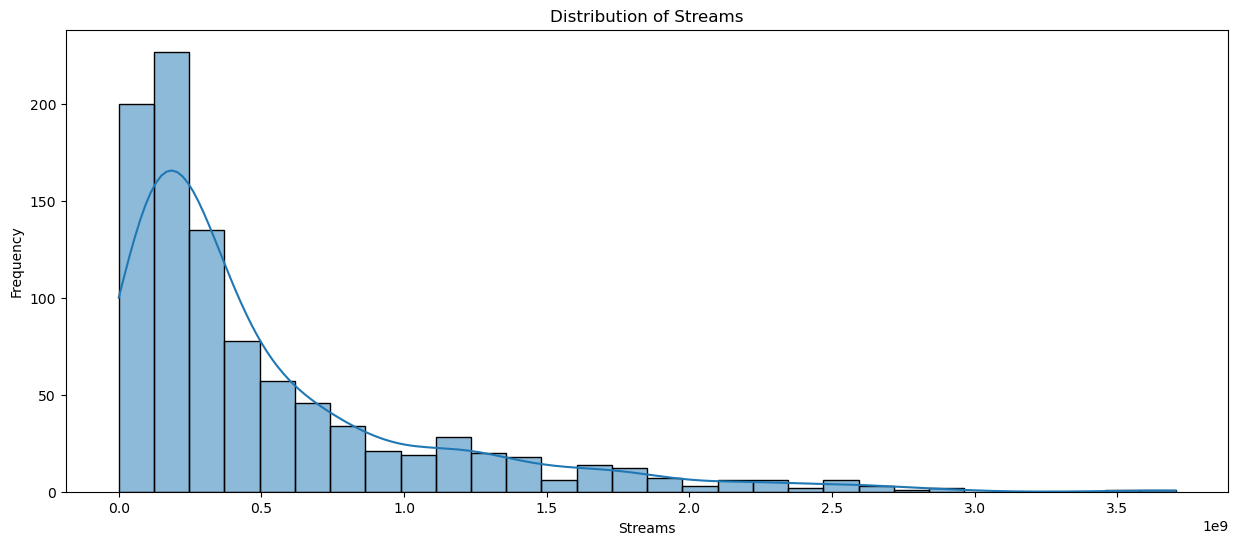

In [70]:
#distribution of streams
plt.figure(figsize=(15, 6))
sns.histplot(df['streams'], bins=30, kde=True)
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.show()

The distribution of streams plot suggests a wide range in the number of streams, with some songs having exceptionally high stream counts.

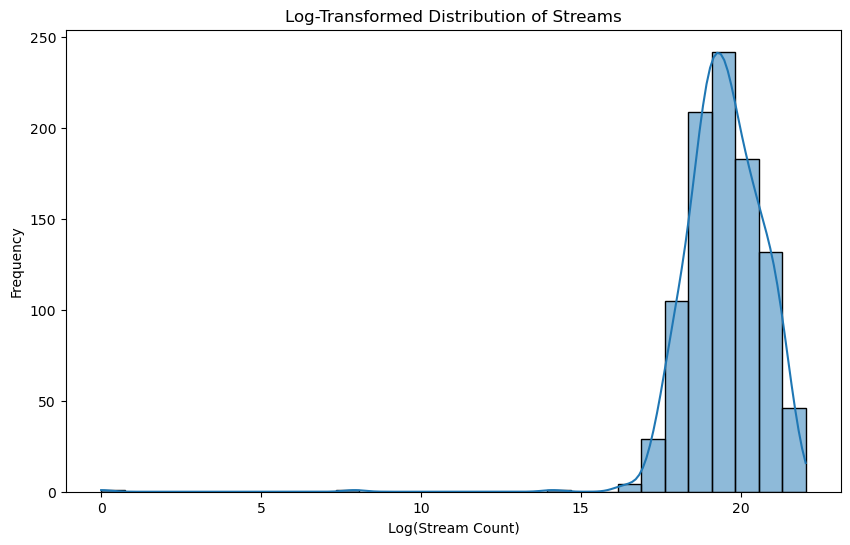

In [16]:
#visualize the overall distribution of stream counts

plt.figure(figsize=(10, 6))
sns.histplot(df['streams'].apply(lambda x: np.log(x+1)), bins=30, kde=True)
plt.title('Log-Transformed Distribution of Streams')
plt.xlabel('Log(Stream Count)')
plt.ylabel('Frequency')
plt.show()

Using the log transformation helps reduce the impact of extreme values, making it easier to visualize the distribution as a whole. Most songs have stream counts after log transformation falling within the range of about 15 to 20.

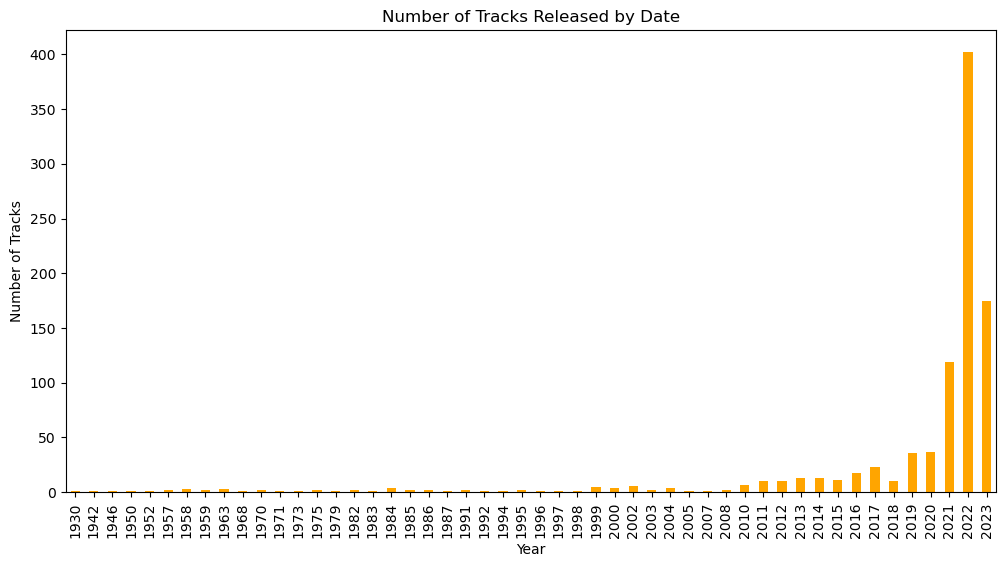

In [17]:
#Time Trends - Number of Tracks Released by Year and Month
plt.figure(figsize=(12, 6))
df.groupby('year')['track_name'].count().plot(kind='bar', color='orange')
plt.title('Number of Tracks Released by Date')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.show()

The sharp rise in song releases in recent years is likely linked to the emergence of digital music platforms and streaming services. The graph underscores a notable surge in music creation and release, especially in recent decades.

The plot depicting the number of songs released annually demonstrates a substantial upward trend in releases over time, notably in recent years, indicating the influence of digital music distribution.

Here, it's evident that the year 2022 witnessed the highest number of tracks which is more than 400 tracks released compared to all other years.

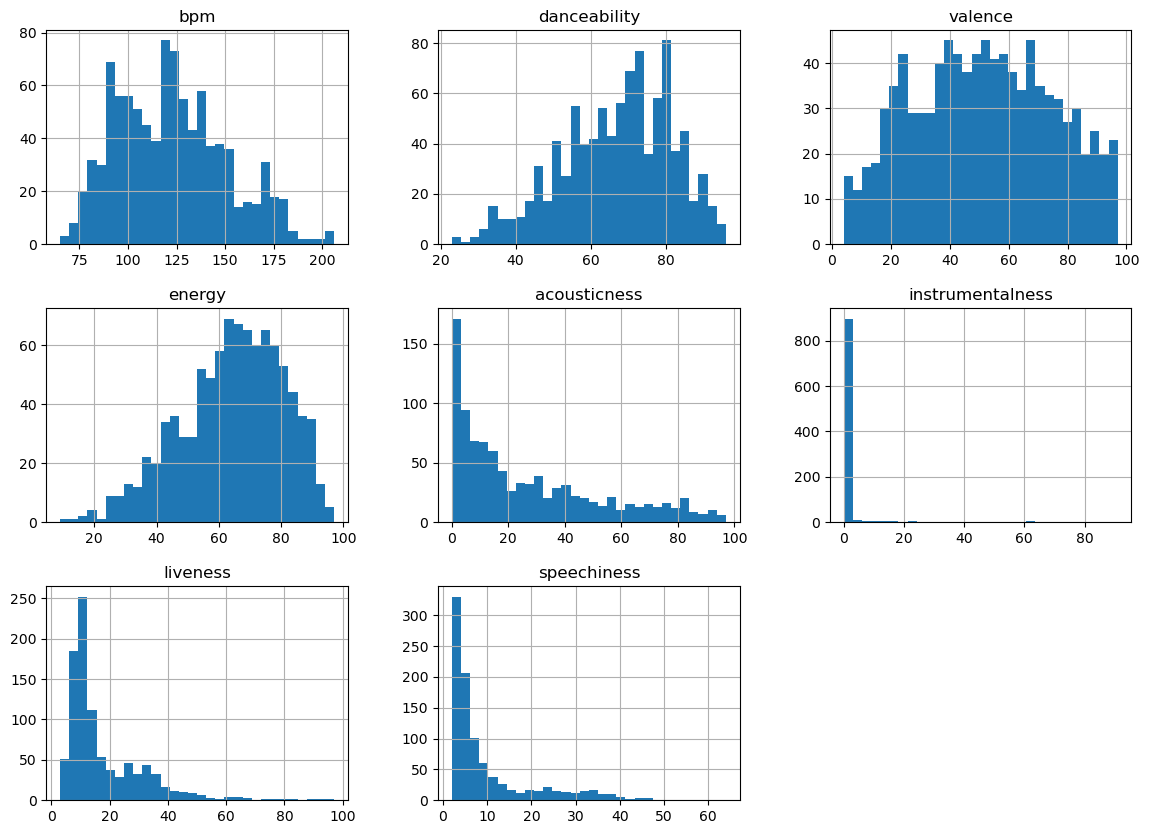

In [20]:
# Distribution plots for numeric features
numeric_features = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
df[numeric_features].hist(figsize=(14, 10), bins=30)
plt.show()

The above charts shows the distribution plots for numerical features which will further explained and visualized in the correlation matrix in below chart.

For reference:

bpm: Beats per minute - a measure of tempo in music.

danceability: A measure of how suitable a track is for dancing.

valence: The musical positiveness conveyed by a track.

energy: The perceived energy of a track.

acousticness: A measure of how acoustic a track is.

instrumentalness: A measure of whether a track contains vocals.

liveness:  A measure of presence of live elements in a track.

speechiness: A measure of presence of spoken words in a track.

In [21]:
# Check for any non-numeric entries in the numeric columns
for feature in numeric_features:
    non_numeric = df[~df[feature].apply(lambda x: isinstance(x, (int, float)))]
    if not non_numeric.empty:
        print(f"Non-numeric values found in {feature}:\n", non_numeric)

In [22]:
# Convert columns to numeric, forcing errors to NaN
for feature in numeric_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

# Check for any NaN values introduced
print(df[numeric_features].isna().sum())

bpm                 0
danceability        0
valence             0
energy              0
acousticness        0
instrumentalness    0
liveness            0
speechiness         0
dtype: int64


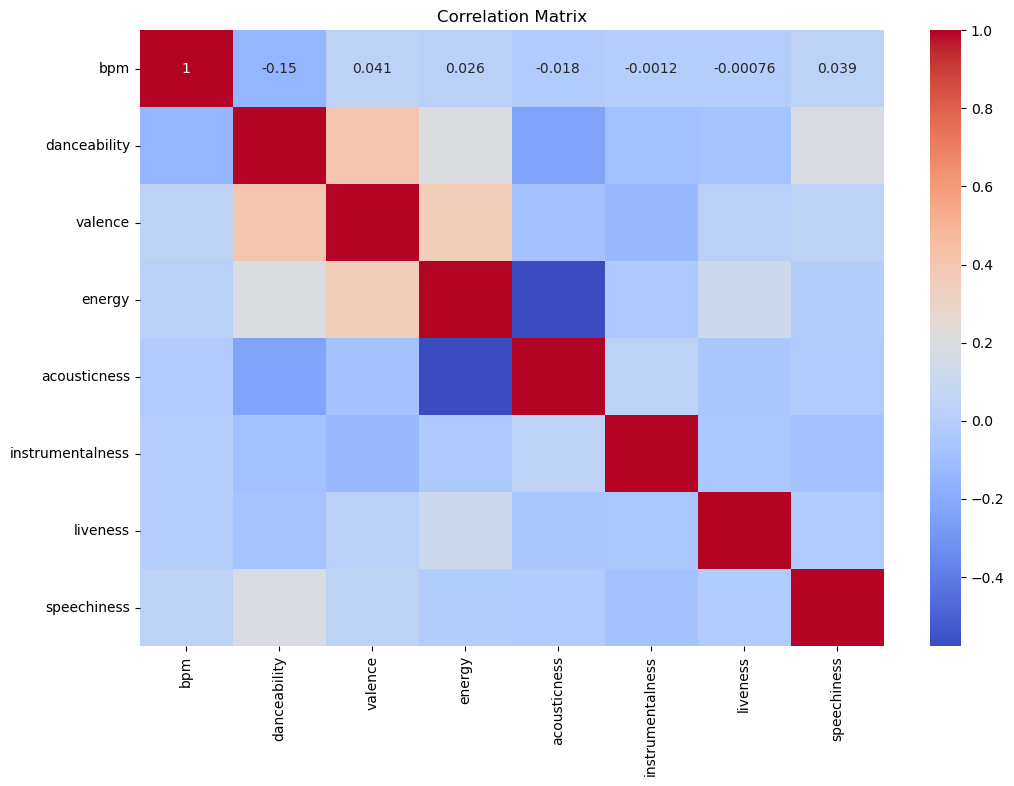

In [23]:
# Calculate the correlation matrix
correlation_matrix = df[numeric_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The correlation matrix provides insights into the relationships between different numerical features in this dataset. Each cell in the matrix represents the correlation coefficient between two features, ranging from -1 to 1 as shown in the chart above.

Identify Strong Correlations: Look for pairs of features with high absolute correlation coefficients (close to 1 or -1). These indicate strong linear relationships between the features. For example, if 'danceability' and 'energy' have a high positive correlation, it means that songs with higher danceability tend to have higher energy.

Feature Selection: If we're planning to build predictive models, we can use the correlation matrix to identify features that are highly correlated with the target variable. Features with high correlation coefficients are often good candidates for inclusion in the model, as they might have strong predictive power.

Multicollinearity Detection: Multicollinearity occurs when two or more features are highly correlated with each other. This can cause issues in some statistical models. By examining the correlation matrix, we can detect multicollinearity and decide how to handle it, such as by removing one of the correlated features or using regularization techniques.

Visualization: Visualize the correlation matrix using a heatmap to make it easier to interpret. Heatmaps provide a visual representation of the correlation matrix, with color indicating the strength and direction of the correlation. This can help us quickly identify patterns and relationships in the data.

Further Analysis: Once we've identified correlations of interest, we can perform further analysis to understand why those correlations exist. This might involve examining individual data points or exploring the relationship in more detail using additional visualizations or statistical tests.

4. Deeper Analysis

    (a) Correlation Analysis: Calculate the correlation coefficient between danceability and energy to quantify their relationship.

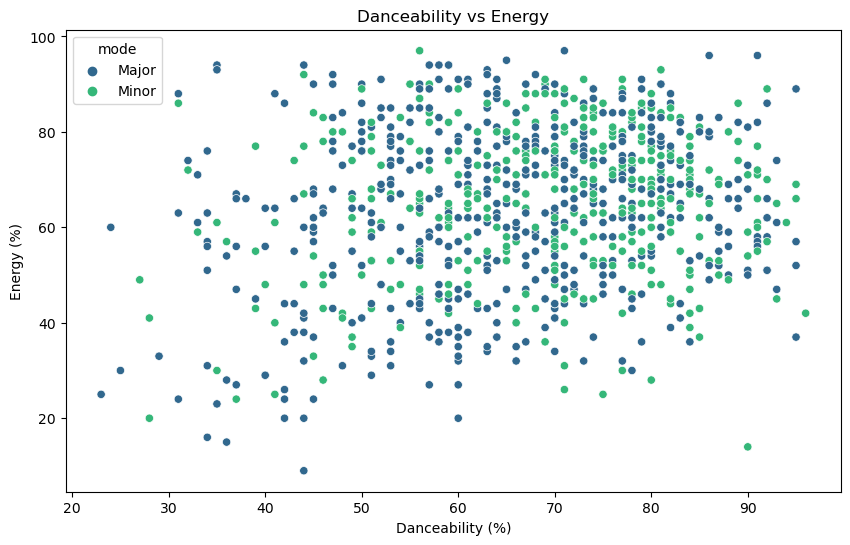

In [24]:
#relationship between Danceability and Energy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='energy', data=df, hue='mode', palette='viridis')
plt.title('Danceability vs Energy')
plt.xlabel('Danceability (%)')
plt.ylabel('Energy (%)')
plt.show()

In [26]:
correlation = df['danceability'].corr(df['energy'])
print(f'Correlation between Danceability and Energy: {correlation}')

Correlation between Danceability and Energy: 0.1980948483762571


Both Major and Minor songs cover a wide range of danceability and energy values. The plot suggests that neither danceability nor energy is strongly dependent on the musical mode.

The danceability vs energy plot indicates a diverse range of songs, with no strong correlation between danceability and energy, and shows that both Major and Minor songs span a wide range of these attributes.

The scatter plot shows a wide range of danceability and energy values, with no strong correlation between the two and it also proven by the correlation coefficient which stands low at 0.198.

    (b) Correlation Analysis: Calculate the correlation coefficient between danceability and valence to quantify their relationship.

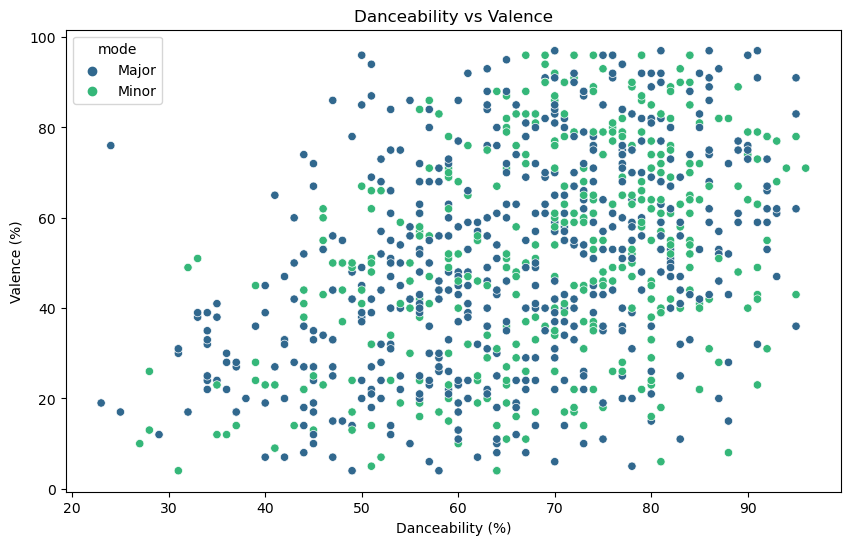

In [28]:
#relationship between Danceability and valence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='valence', data=df, hue='mode', palette='viridis')
plt.title('Danceability vs Valence')
plt.xlabel('Danceability (%)')
plt.ylabel('Valence (%)')
plt.show()

In [29]:
correlation = df['danceability'].corr(df['valence'])
print(f'Correlation between Danceability and Valence: {correlation}')

Correlation between Danceability and Valence: 0.4084514401611994


A correlation coefficient of 0.408 indicates a moderate positive correlation between danceability and valence. From this, what we can deduce are:

Moderate Positive Correlation: The positive correlation coefficient suggests that there is a tendency for songs with higher danceability to also have higher valence (positiveness). However, the correlation is not extremely strong, indicating that the relationship is moderate rather than strong.

Interpretation: A correlation coefficient of 0.408 implies that there is a discernible, but not overwhelming, relationship between danceability and valence. In practical terms, it means that as danceability increases, valence tends to increase as well, but the strength of this relationship is not particularly strong.

Relevance to Music Analysis: This correlation can be useful for music analysis and understanding listener preferences. For example, it suggests that songs that are easier to dance to (high danceability) might also tend to have more positive emotional content (high valence), which could influence listener enjoyment.

Consider Other Factors: While this correlation provides valuable insights, it's important to remember that it only captures the linear relationship between danceability and valence. Other factors, such as genre, tempo, and lyrics, also play a role in shaping the emotional and danceable qualities of a song.

Overall, while a correlation coefficient of 0.408 indicates a moderate positive relationship between danceability and valence, it's just one piece of the puzzle in understanding the complex interplay of musical characteristics.


    (c) Cluster Analysis: Perform a clustering algorithm (e.g., K-Means) to identify natural groupings within the data.

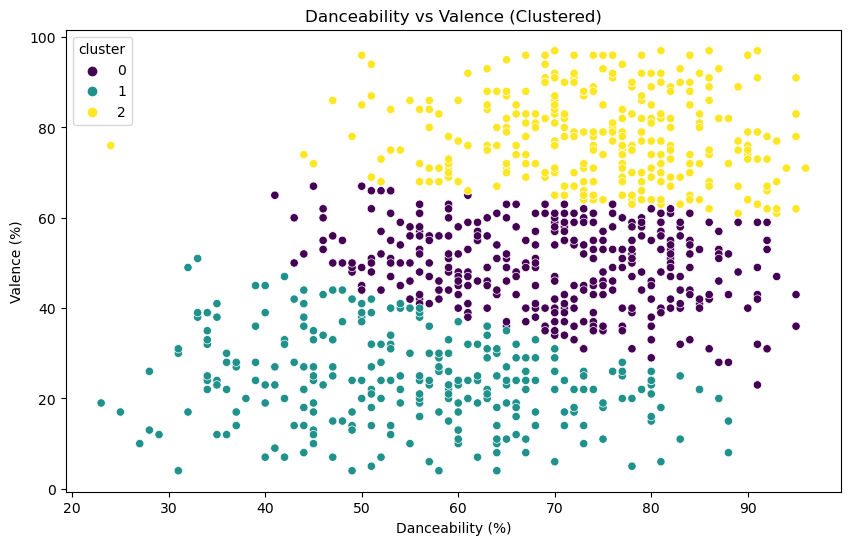

In [30]:
from sklearn.cluster import KMeans

X = df[['danceability', 'valence']]
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='valence', data=df, hue='cluster', palette='viridis')
plt.title('Danceability vs Valence (Clustered)')
plt.xlabel('Danceability (%)')
plt.ylabel('Valence (%)')
plt.show()

Cluster 0 (Purple): 

-Represents a group with moderate Danceability (30-70%) and a wide range of Valence (10-80%).

-In addition to its moderate danceability and wide range of valence, Cluster 0 might represent tracks with a diverse emotional range, spanning from moderately positive to moderately negative.

-This cluster likely contains songs that are suitable for dancing but may vary in emotional tone, appealing to listeners seeking a mix of moods in their music.

Cluster 1 (Teal): 

-Mostly lower Danceability (20-60%) and Valence (0-40%).

-Alongside its lower danceability and valence, Cluster 1 may consist of tracks with a subdued and melancholic feel, lacking in both energy and positiveness.

-These songs might be perceived as less upbeat and less emotionally uplifting, possibly catering to listeners seeking more introspective or subdued musical experiences.

Cluster 2 (Yellow): 

-Shows higher Danceability (40-90%) with relatively higher Valence (60-100%).

-Reflecting higher danceability and relatively higher valence, Cluster 2 likely encompasses tracks that are both rhythmically engaging and emotionally positive.

-Songs in this cluster may evoke feelings of joy, excitement, or enthusiasm, making them ideal choices for listeners looking for energetic and emotionally uplifting music experiences.

    (d) Artist Analysis: Investigate whether specific artists are contributing more to the increase in song releases in recent years.

artists
Taylor Swift        29
The Weeknd          21
SZA                 19
Bad Bunny           19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Drake, 21 Savage     8
Feid                 8
BTS                  8
Name: count, dtype: int64


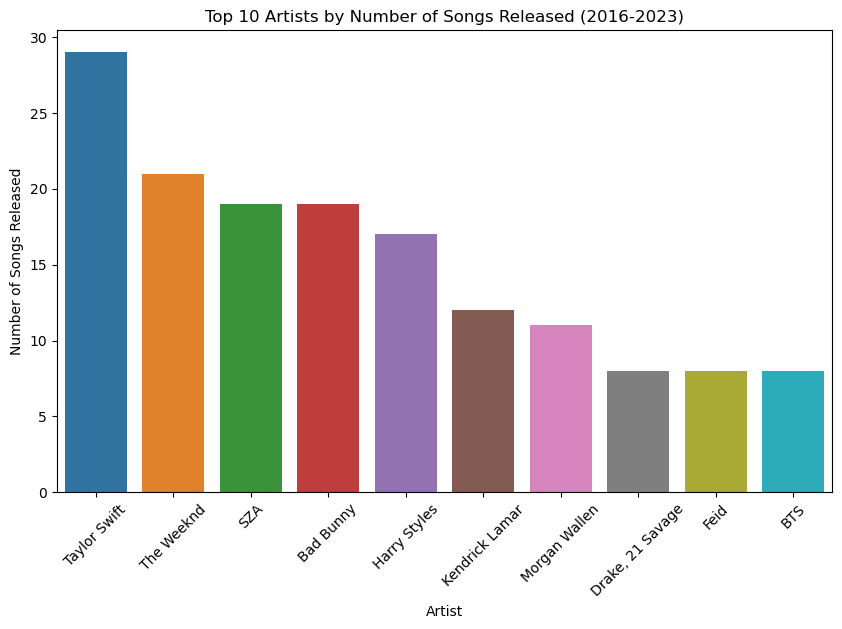

In [27]:
recent_years = df[df['year'] > 2015]
top_artists = recent_years['artists'].value_counts().head(10)
print(top_artists)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.title('Top 10 Artists by Number of Songs Released (2016-2023)')
plt.xlabel('Artist')
plt.ylabel('Number of Songs Released')
plt.xticks(rotation=45)
plt.show()

High Productivity: Taylor Swift stands out with the most song releases, reflecting her high productivity and consistent engagement with her audience.

Genre Diversity: The list includes artists from various genres, including pop, R&B, hip-hop, reggaeton, and K-pop, indicating that high productivity spans across different musical styles.

Popular Artists: The presence of well-known artists like The Weeknd, Bad Bunny, and BTS highlights their popularity and the high demand for their music.

Strategic Releases: These artists likely release multiple singles, EPs, or albums strategically to maintain visibility and engagement with their fans.

5. Conclusion


Based on the analysis conducted, we've identified several key insights that can address our main business problem of understanding the factors contributing to the popularity of music tracks across streaming platforms:

(a) Through the analysis, we've identified metrics like danceability, valence, and energy as important factors influencing the popularity of music tracks. These metrics provide valuable insights into the characteristics that resonate with listeners and drive engagement.

(b) The cluster analysis revealed distinct groups of tracks based on their danceability and valence, providing a deeper understanding of the different types of music that resonate with audiences. This segmentation can inform targeted marketing strategies and playlist curation efforts tailored to specific listener preferences.

(c) By examining the correlation between these metrics and the popularity of tracks, we can further refine our understanding of which attributes have the greatest impact on track performance. This knowledge can guide decision-making for music producers, streaming platforms, and marketers, enabling them to optimize their strategies for promoting tracks and enhancing user engagement.

(d) Overall, this analysis equips stakeholders in the music industry with actionable insights to optimize their approaches for promoting tracks, curating playlists, and driving user engagement across various streaming platforms. By leveraging these insights, they can better meet the evolving preferences of listeners and maximize the success of their music offerings.

YouTube link: 

Thank you.